In [1]:
##import required library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# supressing warnings
import warnings
warnings.filterwarnings('ignore')

# Set figure size to (14,6)
plt.rcParams['figure.figsize'] = (14,6)

In [2]:
##load the temp remainder data from file
remainder=pd.read_csv('temp_remainder.csv', parse_dates=['date'])
remainder.head()

,date,remainder
0,1970-01-01,-12.580627
1,1970-01-02,-4.680726
2,1970-01-03,-1.180825
3,1970-01-04,-4.180924
4,1970-01-05,-2.781023


In [3]:
##set remainder as index
remainder.set_index('date', inplace=True)
remainder.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18262 entries, 1970-01-01 to 2019-12-31
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   remainder  18262 non-null  float64
dtypes: float64(1)
memory usage: 285.3 KB


In [4]:
###create a time-lagged feature in the remainder df
##creating lag1:lag at 1 step
remainder['lag1']= remainder.shift(1) # shifting by one step == month
remainder.head()

##the remainder shifter down at one step

,remainder,lag1
date,,
1970-01-01,-12.580627,NaN
1970-01-02,-4.680726,-12.580627
1970-01-03,-1.180825,-4.680726
1970-01-04,-4.180924,-1.180825
1970-01-05,-2.781023,-4.180924


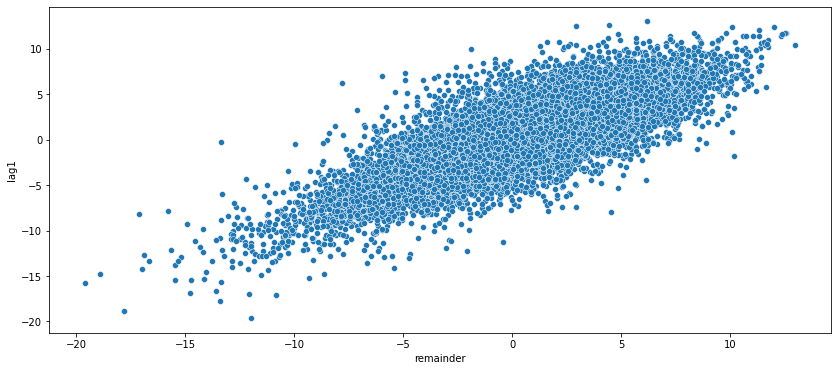

In [5]:
###check correltion betw remainder and the created lag1
sns.scatterplot(x='remainder',  y='lag1', data=remainder);

plt.show()

In [6]:
remainder['remainder'].corr(remainder['lag1'])  ###high correalation

0.8060515191189683

# Method to choose the right lagstep

Through Partial autocorrelation

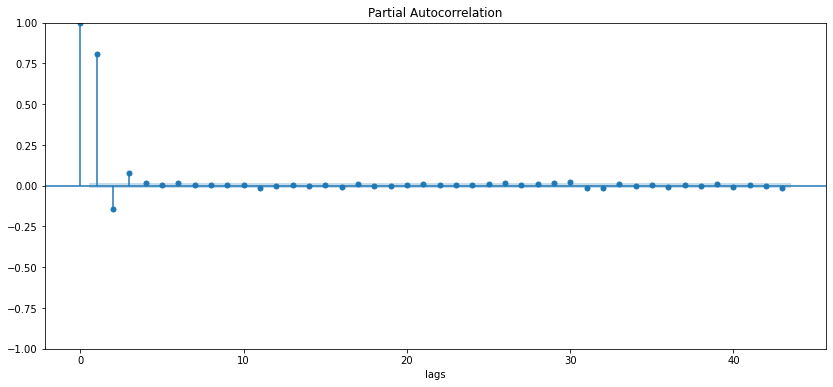

In [7]:
# we can plot auto-correlation with stats model

from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(remainder['remainder'])
plt.xlabel('lags');

plt.show()

2. Through Autoregressive select order

In [8]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

selected_order = ar_select_order(remainder['remainder'], maxlag = 13)

In [9]:
selected_order.ar_lags

[1, 2, 3]

In [10]:
stats_ar3 = AutoReg(remainder['remainder'], lags=3).fit()

In [11]:
stats_ar3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:              remainder   No. Observations:                18262
Model:                     AutoReg(3)   Log Likelihood              -41068.769
Method:               Conditional MLE   S.D. of innovations              2.294
Date:                Thu, 27 Jan 2022   AIC                          82147.539
Time:                        18:20:30   BIC                          82186.601
Sample:                    01-04-1970   HQIC                         82160.375
                         - 12-31-2019                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0004      0.017      0.022      0.982      -0.033       0.034
remainder.L1     0.9326      0.007    126.392      0.000       0.918       0.947
remainder.L2    -0.2139      0.010    -21.433      0.000      -0.233      -0.194
remainder.L3     0.0766      0.007     10.379      0.000       0.062       0.091
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2749           -0.0000j            1.2749           -0.0000
AR.2            0.7594           -3.1096j            3.2009           -0.2119
AR.3            0.7594           +3.1096j            3.2009            0.2119
-----------------------------------------------------------------------------
"""

In [12]:
stats_ar3.predict()

1970-01-01         NaN
1970-01-02         NaN
1970-01-03         NaN
1970-01-04   -1.062934
1970-01-05   -4.004611
                ...   
2019-12-27    1.406186
2019-12-28   -0.197869
2019-12-29   -1.537627
2019-12-30   -2.502944
2019-12-31    1.833977
Freq: D, Length: 18262, dtype: float64